# WeatherPy
----

### Description:
Trends 1: In the Northern Hemisphere, temperature decreases with increasing latitude.<br/>
Trends 2: In the Southern Hemisphere, temperature increases with latitude.<br/>

The equator has the highest temperature, and the temperature gradually decreases as it moves along the equator towards the earth's poles.<br/>
But overall temperatures in the southern hemisphere are higher than in the northern hemisphere.This is because the surface in the Southern Hemisphere has more water. And water has a high specific heat capacity so it loses heat slowly.<br/>
I also discovered this while doing the Generate Cities List. For haveing the similar amount of data(roughly 300 cities), I only need 600 random points in the southern hemisphere,but 1600 in the northern hemisphere.<br/>
The difference in land area between the northern and southern hemispheres also affects the Linear Regression plot. <br/>There is a very strong negative correlation between Max Temp Latitude in the Northern Hemisphere. However, the correlation in Southern Hemisphere becomes weaker due to this difference, which showes a moderate correlation.<br/>
<br/>
Trends 3: There are clear clumps at 0% and 100%, and less clear clumps at 75% and 20% in the Latitude vs. Cloudiness Plot.<br/>
But there is no significant correlation between latitude and Cloudiness.<br/>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_WeatherPy/cities.csv"



## Generate Cities List

In [2]:
north_lat_lngs = []
north_cities = []
south_cities =[]

# Create a set of random lat and lng combinations
north_lats = np.random.uniform(low=0, high=90.000, size=600)
north_lngs = np.random.uniform(low=-180.000, high=180.000, size=600)
north_lat_lngs = zip(north_lats, north_lngs)

# Identify nearest city for each lat, lng combination
for north_lat_lng in north_lat_lngs:
    north_city = citipy.nearest_city(north_lat_lng[0], north_lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if north_city not in north_cities:
        north_cities.append(north_city)

# Create a set of random lat and lng combinations
south_lats = np.random.uniform(low=-90.000, high=0, size=1600)
south_lngs = np.random.uniform(low=-180.000, high=180.000, size=1600)
south_lat_lngs = zip(south_lats, south_lngs)

# Identify nearest city for each lat, lng combination
for south_lat_lng in south_lat_lngs:
    south_city = citipy.nearest_city(south_lat_lng[0], south_lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if south_city not in south_cities:
        south_cities.append(south_city)
        
# Print the city count to confirm sufficient count
print(f'Exported {len(north_cities)} cities in the Northern Hemisphere')
print(f'Exported {len(south_cities)} cities in the Southern Hemisphere')

Exported 365 cities in the Northern Hemisphere
Exported 307 cities in the Southern Hemisphere


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
clouds = []
country = []
date = []
tempmax = []
humidity = []
lat = []
lon = []
windspeed = []
cityname = []

# use loop to get all the column value.
# use try to exclusive the city that can't be found.

#doesn't mention the task relate to temperate history. Therefore, use the current API.
k=1
for city in north_cities:
    if len(cityname)<270:
        units="imperial"
        url_weater = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units={units}"
        weater_detail = requests.get(url_weater).json()
        try: 
            clouds.append(weater_detail["clouds"]["all"])
            country.append(weater_detail["sys"]["country"])
            date.append(weater_detail["dt"])
            tempmax.append(weater_detail["main"]['temp_max'])
            humidity.append(weater_detail["main"]['humidity'])
            lat.append(weater_detail["coord"]["lat"])  
            lon.append(weater_detail["coord"]["lon"])
            windspeed.append(weater_detail["wind"]["speed"])
            cityname.append(weater_detail["name"])
            print(f"Processing record {k}|{city}")
            k+=1
        except (KeyError):
            print("City is not found. skipping.")

for city in south_cities:
    if len(cityname)<540:
        units="imperial"
        url_weater = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units={units}"
        weater_detail = requests.get(url_weater).json()
        try: 
            clouds.append(weater_detail["clouds"]["all"])
            country.append(weater_detail["sys"]["country"])
            date.append(weater_detail["dt"])
            tempmax.append(weater_detail["main"]['temp_max'])
            humidity.append(weater_detail["main"]['humidity'])
            lat.append(weater_detail["coord"]["lat"])  
            lon.append(weater_detail["coord"]["lon"])
            windspeed.append(weater_detail["wind"]["speed"])
            cityname.append(weater_detail["name"])
            print(f"Processing record {k}|{city}")
            k+=1
        except (KeyError):
            print("City is not found. skipping.")


Processing record 1|olden
Processing record 2|kodino
Processing record 3|oranjestad
Processing record 4|kyra
Processing record 5|grosuplje
Processing record 6|ukiah
Processing record 7|gat
Processing record 8|visby
Processing record 9|victoria
Processing record 10|yellowknife
Processing record 11|otanche
Processing record 12|sitka
City is not found. skipping.
Processing record 13|qaanaaq
Processing record 14|cherskiy
Processing record 15|upernavik
Processing record 16|dikson
Processing record 17|elat
Processing record 18|tuktoyaktuk
Processing record 19|hambantota
Processing record 20|kankakee
Processing record 21|ahuimanu
Processing record 22|kirkuk
Processing record 23|codrington
Processing record 24|hirado
Processing record 25|kedrovyy
Processing record 26|berbera
Processing record 27|vanimo
Processing record 28|hilo
City is not found. skipping.
Processing record 29|abha
Processing record 30|airai
City is not found. skipping.
Processing record 31|todos santos
Processing record 32|ya

Processing record 239|berlevag
Processing record 240|mahibadhoo
City is not found. skipping.
City is not found. skipping.
Processing record 241|grants
Processing record 242|kaura namoda
Processing record 243|hithadhoo
Processing record 244|college
Processing record 245|dukat
Processing record 246|puerto escondido
Processing record 247|prince rupert
Processing record 248|massaguet
Processing record 249|omsukchan
Processing record 250|uyemskiy
City is not found. skipping.
Processing record 251|aktau
Processing record 252|hobyo
Processing record 253|hasaki
Processing record 254|ranong
Processing record 255|oktyabrskiy
Processing record 256|santa teresa
Processing record 257|mersing
Processing record 258|debre tabor
Processing record 259|isla mujeres
Processing record 260|nha trang
Processing record 261|turkistan
Processing record 262|cedar city
Processing record 263|nicoya
Processing record 264|tazovskiy
Processing record 265|predivinsk
Processing record 266|vendychany
Processing record 2

Processing record 480|tiarei
City is not found. skipping.
Processing record 481|flinders
Processing record 482|sao felix do xingu
Processing record 483|arawa
Processing record 484|guayaramerin
Processing record 485|tabou
Processing record 486|menongue
Processing record 487|ngorongoro
Processing record 488|wote
Processing record 489|ipiau
Processing record 490|maraba
Processing record 491|pocoes
Processing record 492|mitsamiouli
Processing record 493|touros
Processing record 494|aiquile
City is not found. skipping.
Processing record 495|katherine
Processing record 496|san joaquin
Processing record 497|san patricio
Processing record 498|moba
Processing record 499|caconda
Processing record 500|whittlesea
City is not found. skipping.
Processing record 501|moree
Processing record 502|riachao das neves
Processing record 503|mahajanga
Processing record 504|avera
Processing record 505|carauari
Processing record 506|governador valadares
Processing record 507|tapes
Processing record 508|coahuaya

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({"City":cityname, 
                        "Lat":lat,
                        "Lng":lon,
                        "Max Temp":tempmax,
                        "Humidity":humidity,
                        "Cloudiness":clouds, 
                        "Wind Speed":windspeed,
                        "Country":country, 
                        "Date":date})

#Exporting data to csv
weather_df.to_csv(f'../{output_data_file}',index=False)

print(f' There is a total of {len(weather_df.index)} rows of values are contained in this DataFrame')

#Displaying dataframe
weather_df.head()

 There is a total of 540 rows of values are contained in this DataFrame


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Olden,61.8364,6.8064,45.34,86,3,7.72,NO,1647342754
1,Kodino,63.7198,39.6447,28.02,74,8,8.66,RU,1647342755
2,Oranjestad,12.5240,-70.0270,76.95,83,20,11.50,AW,1647342755
3,Kyra,49.5776,111.9753,8.62,59,87,11.77,RU,1647342755
4,Grosuplje,45.9556,14.6589,53.08,58,100,8.01,SI,1647342755


In [5]:
Count=[]
Mean=[]
Std=[]
Min=[]
Max=[]
Lowerq =[]
Mediq=[]
Upperq =[]

column_name = weather_df.columns.tolist()
for x in column_name:
    try: 
        Mean.append(weather_df[x].mean())
        Count.append(weather_df[x].count())
        Std.append(weather_df[x].std())
        Min.append(weather_df[x].min())
        Max.append(weather_df[x].max())
        Lowerq.append(weather_df[x].quantile(.25))
        Mediq.append(weather_df[x].quantile(.5))
        Upperq.append(weather_df[x].quantile(.75))


    except TypeError:
        Mean=Mean
        Count=Count
        Std=Std
        Min=Min
        Max=Max
        Lowerq=Lowerq
        Mediq=Mediq
        Upperq=Upperq
        
all_rows = [Count,Mean,Std,Min,Lowerq,Mediq,Upperq,Max]
Summary_df = pd.DataFrame(all_rows, columns=['Lat', 'Lng',"Max Temp","Humidity","Cloudiness","Wind Speed","Date"],
                  index=['count', 'mean',"std","min","25%","50%","75%","max"])
Summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,10.408511,15.505439,59.757852,72.388889,63.451852,7.311778,1.647343e+09
std,33.902753,91.541192,27.185163,21.902903,38.273204,5.388030,7.780544e+01
min,-54.800000,-175.200000,-21.840000,1.000000,0.000000,0.000000,1.647343e+09
25%,-17.924125,-61.357200,48.757500,62.000000,21.750000,3.420000,1.647343e+09
50%,5.141900,19.130550,68.340000,77.000000,76.000000,5.905000,1.647343e+09
75%,40.240250,96.607925,78.855000,88.000000,100.000000,10.290000,1.647343e+09
max,78.218600,179.316700,102.310000,100.000000,100.000000,42.520000,1.647343e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. <br>
___From the above DataFrame,the maximum of humidity is 100%.___<br>
___Therefore, no no cities that have humidity > 100%___ <br>
___This step is skipped.___

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<b/>Conclusion：<br/>
The equator has the highest temperature, and the temperature gradually decreases as it moves along the equator towards the earth's poles.<br/>

<IPython.core.display.Javascript object>


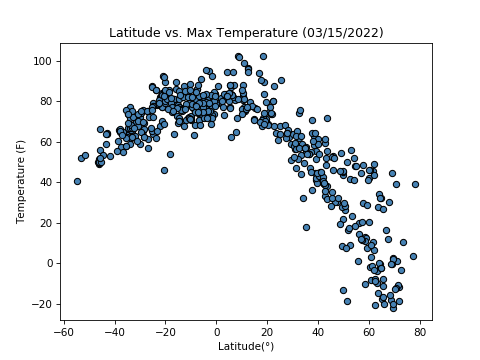

In [9]:
%matplotlib notebook
import datetime

today = time.strftime("%m/%d/%Y")
# Creat the chart
plt.scatter(weather_df["Lat"], weather_df["Max Temp"],facecolor = "steelblue", edgecolor = "black")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude vs. Max Temperature ({today})")
plt.show()

# Save the chart
plt.savefig("../output_WeatherPy/Latitude vs. Temperature (Max).png")


## Latitude vs. Humidity Plot

<b/>Conclusion：<br/>
There is no obvious correlation between the two variables.<br/>
But, when the latitude is between 0 to 20, the humidity is the lowest.<br/>
Afterwards, as the latitude moves to the sides, the humidity gradually increases.<br/>

<IPython.core.display.Javascript object>


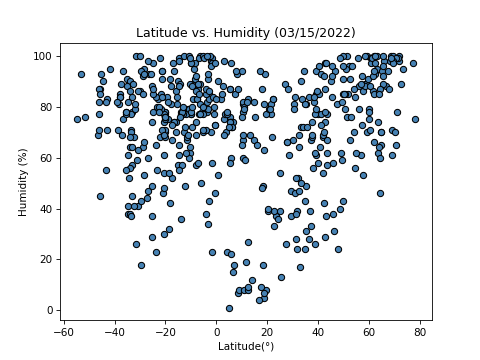

In [10]:
# Creat the chart
plt.scatter(weather_df["Lat"], weather_df["Humidity"],facecolor = "steelblue", edgecolor = "black")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs. Humidity ({today})")
plt.show()

# Save the chart
plt.savefig("../output_WeatherPy/Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

<b/>Conclusion：<br/>
There is no obvious correlation between the two variables.<br/>
But cloud cover appears to be centered around 0% and 100%.<br/>
And in the middle part, the plot has a certain concentration in the 20% and 75% parts.<br/>

<IPython.core.display.Javascript object>


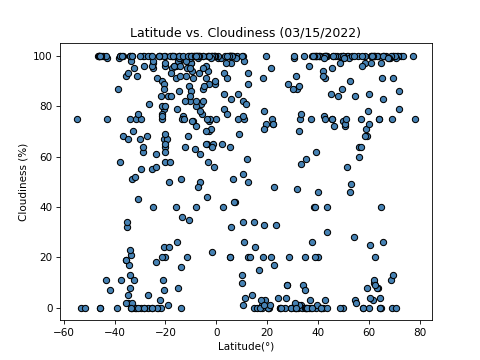

In [11]:
# Creat the chart
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"],facecolor = "steelblue", edgecolor = "black")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs. Cloudiness ({today})")
plt.show()

# Save the chart
plt.savefig("../output_WeatherPy/Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

<b/>Conclusion：<br/>
There is no obvious correlation between the two variables.<br/>
But for most cities, they have wind speeds between 0-20 mph.<br/>

<IPython.core.display.Javascript object>


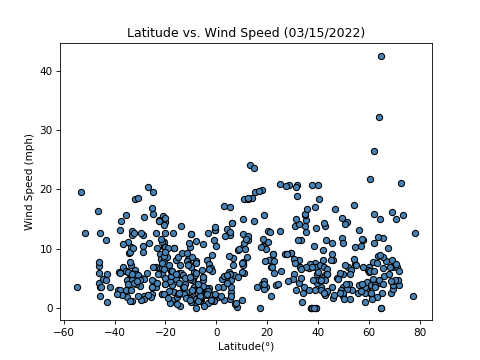

In [12]:
# Creat the chart
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],facecolor = "steelblue", edgecolor = "black")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs. Wind Speed ({today})")
plt.show()

# Save the chart
plt.savefig("../output_WeatherPy/Latitude vs. Wind Speed.png")

## Linear Regression

In [13]:
northern_df = weather_df.loc[weather_df["Lat"].astype(float) >=0]
southern_df = weather_df.loc[weather_df["Lat"].astype(float) <=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<b/>Description：<br/>
The R-value between these two variables is -0.88, which means that there is a very strong negative correlation between Max Temp Latitude in the Northern Hemisphere.<br/>
Temperature decreases with the increase of latitude.<br/>
Typically:<br/>
1.0  = |R|         - Perfect positive/negative correlation<br/>
0.8 <= |R| < 1.0   - Very strong positive/negative correlated.<br/>
0.6 <= |R| < 0.8   - Strong positive/negative correlated.<br/>
0.4 <= |R| < 0.6   - Moderate positive/negative correlated.<br/>
0.2 <= |R| < 0.4   - Weak positive/negative correlated.<br/>
0.0 <  |R| < 0.2   - Very weak positive/negative correlated.<br/>
0.0  = |R|         - No correlated.<br/>

<IPython.core.display.Javascript object>


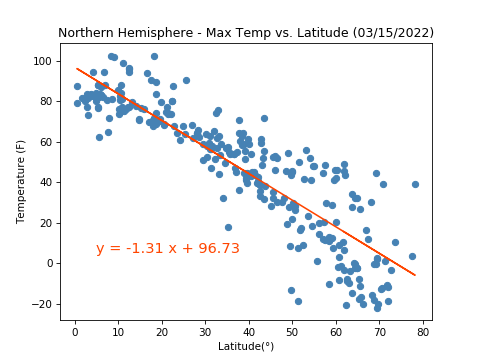

The r-value is: -0.8841421709524415


In [14]:
# Print out the r-squared value along with the plot.
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(5,5),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Temperature (F)")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_WeatherPy/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<b/>Description：<br/>
The R-value between these two variables is 0.66, which means that there is a strong positive correlation between Max Temp and Latitude in the Southern Hemisphere.<br/>
Temperature increase with the increase of latitude.<br/>
This Description matches to the conclusion drawn from the plot `"Latitude vs. Temperature (Max)"` - Besides latitude, the high coverage of surface water is another factor that affects temperatures in Southern Hemisphere.
Therefore, the correlation between Max Temp and Latitude in the Southern Hemisphere is not as strong as it in Northern Hemisphere.

<IPython.core.display.Javascript object>


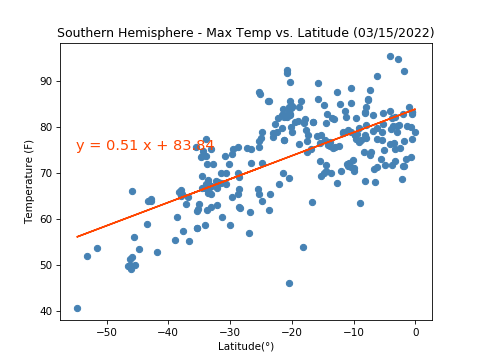

The r-value is: 0.6647750588203566


In [15]:
# Print out the r-squared value along with the plot.
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(-55,75),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Temperature (F)")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()


# Save the chart
plt.savefig("../output_WeatherPy/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<b/>Description：<br/>
The R-value between these two variables is 0.39, which means that there is a weak positive correlation between Humidity and Latitude in the Northern Hemisphere.<br/>
Humidity increase with the increase of latitude.<br/>

<IPython.core.display.Javascript object>


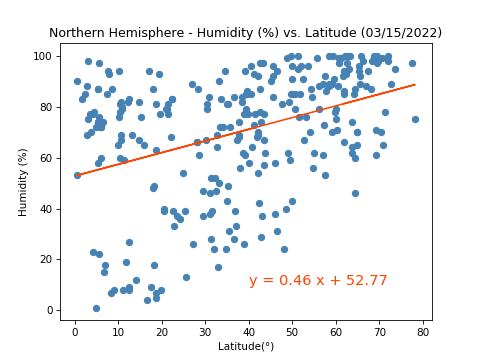

The r-value is: 0.39187770347764167


In [17]:
# Print out the r-squared value along with the plot.
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(40,10),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_WeatherPy/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<b/>Description：<br/>
The R-value between these two variables is 0.12, which means a very weak positive correlation between Humidity and Latitude in the Southern Hemisphere. And it is even weaker in Southern Hemisphere than it is in Northern Hemisphere.<br/>
Humidity increase with the increase of latitude.<br/>

<IPython.core.display.Javascript object>


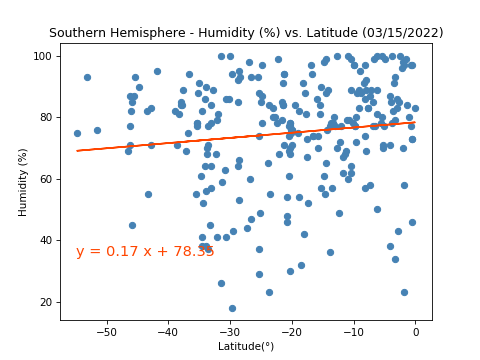

The r-value is: 0.1229072395106704


In [18]:
# Print out the r-squared value along with the plot.
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(-55,35),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_WeatherPy/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<b/>Description：<br/>
The R-value between these two variables is 0.10, which means that there is a very weak positive correlation between Cloudiness and Latitude in the Northern Hemisphere.<br/>
Cloudiness increase with the increase of latitude.<br/>

<IPython.core.display.Javascript object>


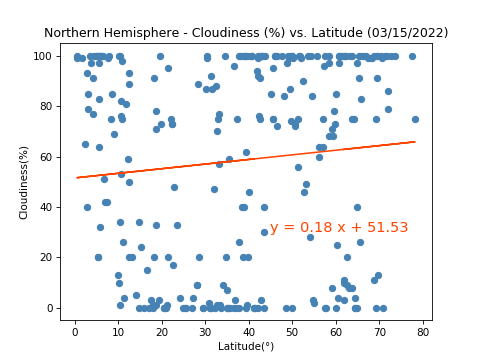

The r-value is: 0.09588299933938615


In [19]:
# Print out the r-squared value along with the plot.
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(45,30),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Cloudiness(%)")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_WeatherPy/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<b/>Description：<br/>
The R-value between these two variables is 0.31, which means that there is a weak positive correlation between Cloudiness and Latitude in the Southern Hemisphere. And it is stronger in Southern Hemisphere than it is in Northern Hemisphere.<br/>
Cloudiness increase with the increase of latitude.<br/>

<IPython.core.display.Javascript object>


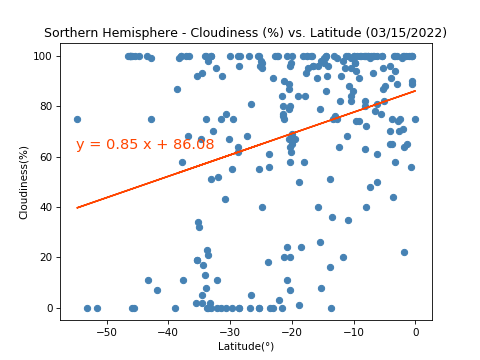

The r-value is: 0.31459861369216885


In [20]:
# Print out the r-squared value along with the plot.
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(-55,63),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Cloudiness(%)")
plt.title(f"Sorthern Hemisphere - Cloudiness (%) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_WeatherPy/Sorthern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<b/>Description：<br/>
The R-value between these two variables is -0.07, which means that there is a very weak negative correlation between Wind Speed and Latitude in the Northern Hemisphere.<br/>
Wind Speed decrease with the increase of latitude.<br/>

<IPython.core.display.Javascript object>


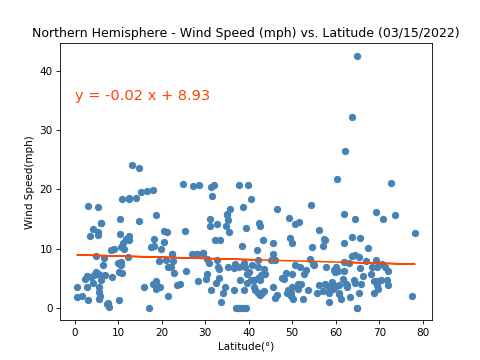

The r-value is: -0.0710642665710781


In [21]:
# Print out the r-squared value along with the plot.
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(0,35),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Wind Speed(mph)")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_WeatherPy/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<b/>Description：<br/>
The R-value between these two variables is -0.21, which means that there is a weak negative correlation between Wind Speed and Latitude in the Southern Hemisphere. And it is stronger in Southern Hemisphere than it is in Northern Hemisphere. But the linear regression goes to the opposite direction, negative instead of positive.<br/>
Wind Speed decreade with the increase of latitude.<br/>

<IPython.core.display.Javascript object>


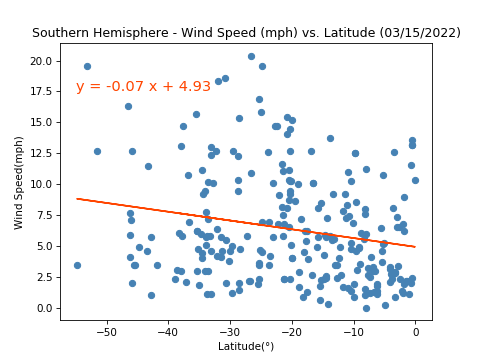

The r-value is: -0.21001894736873455


In [22]:
# Print out the r-squared value along with the plot.
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values,y_values,facecolor = "steelblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(-55,17.5),fontsize=14,color="orangered")

# Set appearance
plt.xlabel("Latitude(°)")
plt.ylabel("Wind Speed(mph)")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude ({today})")
print(f"The r-value is: {rvalue}")
plt.show()

# Save the chart
plt.savefig("../output_WeatherPy/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")